<div class="alert alert-success">
<b>Reviewer's comment V3</b>
	  
Thanks for taking the time to improve the project! It is accepted now. Keep up the good work on the next sprint! 
	  
</div>

**Review**
	  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there is a problem with using the train set data to estimate the profit distribution. It should be pretty straightforward to fix though!

# Project Description

You work for the OilyGiant mining company. Your task is to find the best place for a new well.
Steps to choose the location:

- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

## Import Packages

In [1]:
#import packages
import pandas as pd
import numpy as np
!pip install scikit-learn==0.24.1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
!pip install yellowbrick
from yellowbrick.regressor import ResidualsPlot
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Conclusions

I imported:
- **pandas**: For data preprocessing and basic descriptive statistics
- **numpy**: For adding support for large, multi-dimensional arrays and matrices
- **scikit-learn**: For machine learning processes
- **train_test_split**: For splitting up the data for testing and training
- **LinearRegression**: For running Linear Regressions
- **yellowbrick**: For machine learning visualizations
- **seaborn**: For visualizations
- **matplotlib.pyplot**: For visualizations
- **warnings**: To ignore warnings after finishing the project for readability

## Import Data

In [2]:
#import data
try:
    geo_0 = pd.read_csv('geo_data_0.csv')
except:
    geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
try:
    geo_1 = pd.read_csv('geo_data_1.csv')
except:
    geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
try:
    geo_2 = pd.read_csv('geo_data_2.csv')
except:
    geo_2 = pd.read_csv('/datasets/geo_data_2.csv')
geo_0.info()
geo_1.info()
geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8

### Conclusions

I imported the data and looked through the information. In this dataset, the target variable is `product`, the features are `f0`, `f1`, and `f2`, and `id` is the unique identifier. Based on the information above we can also see there are no missing values and the data types seem to be consistent.

## Clean and Prepare Data

In [3]:
#check if ids are unique
display(geo_0.duplicated(subset='id').value_counts())
display(geo_1.duplicated(subset='id').value_counts())
display(geo_2.duplicated(subset='id').value_counts())
#drop ids that are duplicates
geo_0.drop_duplicates(subset='id',keep=False,inplace=True)
geo_1.drop_duplicates(subset='id',keep=False,inplace=True)
geo_2.drop_duplicates(subset='id',keep=False,inplace=True)
# #remove id
geo_0.drop('id',axis=1,inplace=True)
geo_1.drop('id',axis=1,inplace=True)
geo_2.drop('id',axis=1,inplace=True)
#reset indices
geo_0.reset_index(drop=True,inplace=True)
geo_1.reset_index(drop=True,inplace=True)
geo_2.reset_index(drop=True,inplace=True)


False    99990
True        10
dtype: int64

False    99996
True         4
dtype: int64

False    99996
True         4
dtype: int64

### Conclusions

For this dataset, there were **10** duplicate `id` values in region 0, **4** duplicate `id` values in region 1, and **4** duplicate `id` values in region 2. Since I would expect zero duplicates and cannot explain the reasoning behind it without consulting the data engineer, I decided to remove all observations that have a duplicate `id` value. 

I then dropped the `id` variable from the datasets because it will not be used in the data analysis. 

Lastly, I reset the indices to help with future calculations. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Great, the data was loaded and inspected, you checked for duplicates and dropped the otherwise useless id column!
	  
</div>

## Train and Test 

### Splitting Into Training and Validating Datasets

In [4]:
#split all three regions into training and validating sets
geo_0_train, geo_0_valid = train_test_split(geo_0, test_size=0.25, random_state=13)
geo_1_train, geo_1_valid = train_test_split(geo_1, test_size=0.25, random_state=13)
geo_2_train, geo_2_valid = train_test_split(geo_2, test_size=0.25, random_state=13)

#split by features and targets
geo_0_train_target = geo_0_train['product'].reset_index(drop=True)
geo_0_valid_target = geo_0_valid['product'].reset_index(drop=True)
geo_1_train_target = geo_1_train['product'].reset_index(drop=True)
geo_1_valid_target = geo_1_valid['product'].reset_index(drop=True)
geo_2_train_target = geo_2_train['product'].reset_index(drop=True)
geo_2_valid_target = geo_2_valid['product'].reset_index(drop=True)

geo_0_train_features = geo_0_train.drop('product', axis=1).reset_index(drop=True)
geo_0_valid_features = geo_0_valid.drop('product', axis=1).reset_index(drop=True)
geo_1_train_features = geo_1_train.drop('product', axis=1).reset_index(drop=True)
geo_1_valid_features = geo_1_valid.drop('product', axis=1).reset_index(drop=True)
geo_2_train_features = geo_2_train.drop('product', axis=1).reset_index(drop=True)
geo_2_valid_features = geo_2_valid.drop('product', axis=1).reset_index(drop=True)


#### Conclusions

I split each of the three regions using a 75% train, 25% validate ratio. I then created two new datasets that split the target and feature datasets in both the training and validating datasets. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
The data for each region was split into train and validation
	  
</div>

### Train Models

For Region 0, the root mean squared error for a linear model is 37.41
For Region 0, the average volume of the predicted reserve is 92.72


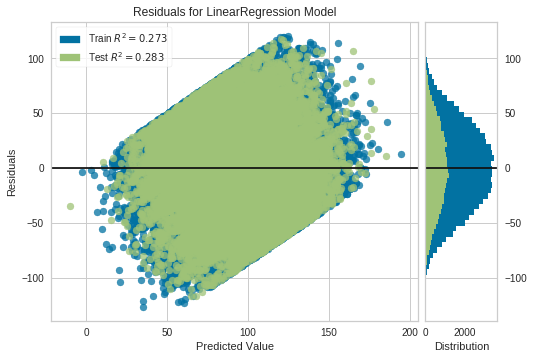

For Region 1, the root mean squared error for a linear model is 0.9
For Region 1, the average volume of the predicted reserve is 68.85


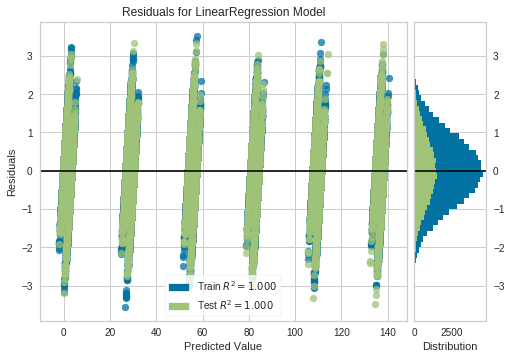

For Region 2, the root mean squared error for a linear model is 40.27
For Region 2, the average volume of the predicted reserve is 95.12


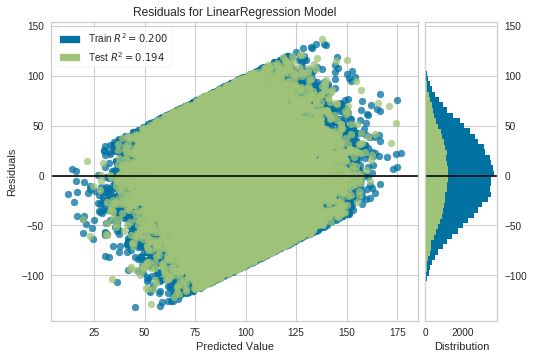

In [5]:
model_0 = LinearRegression()
model_0.fit(geo_0_train_features,geo_0_train_target)
target_pred_0 = model_0.predict(geo_0_valid_features)
print('For Region 0, the root mean squared error for a linear model is', round(mean_squared_error(geo_0_valid_target,target_pred_0,squared=False),2))
print('For Region 0, the average volume of the predicted reserve is', round(target_pred_0.mean(),2))
visualizer = ResidualsPlot(model_0)
visualizer.fit(geo_0_train_features,geo_0_train_target)  # Fit the training data to the visualizer
visualizer.score(geo_0_valid_features,geo_0_valid_target)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure


model_1 = LinearRegression()
model_1.fit(geo_1_train_features,geo_1_train_target)
target_pred_1 = model_1.predict(geo_1_valid_features)
print('For Region 1, the root mean squared error for a linear model is', round(mean_squared_error(geo_1_valid_target,target_pred_1,squared=False),2))
print('For Region 1, the average volume of the predicted reserve is', round(target_pred_1.mean(),2))
visualizer = ResidualsPlot(model_1)
visualizer.fit(geo_1_train_features,geo_1_train_target)  # Fit the training data to the visualizer
visualizer.score(geo_1_valid_features,geo_1_valid_target)  # Evaluate the model on the test data
visualizer.show()       

model_2 = LinearRegression()
model_2.fit(geo_2_train_features,geo_2_train_target)
target_pred_2 = model_2.predict(geo_2_valid_features)
print('For Region 2, the root mean squared error for a linear model is', round(mean_squared_error(geo_2_valid_target,target_pred_2,squared=False),2))
print('For Region 2, the average volume of the predicted reserve is', round(target_pred_2.mean(),2))
visualizer = ResidualsPlot(model_2)
visualizer.fit(geo_2_train_features,geo_2_train_target)  # Fit the training data to the visualizer
visualizer.score(geo_2_valid_features,geo_2_valid_target)  # Evaluate the model on the test data
visualizer.show()  


#### Conclusions

In this section, I trained three linear regression models (one for each region), and then looked at the average predicted volume per reserve, the root mean squared error, and the graph of the residuals. 

For region 0: 
- The average predicted volume of a reserve was **92.72 thousand barrels**.
- The root mean squared error of the linear regression model was **37.41**.
- The residual graph showed a normal distribution with a fairly low maximum. 

For region 1: 
- The average predicted volume of a reserve was **68.85 thousand barrels**.
- The root mean squared error of the linear regression model was **0.9**.
- The residual graph showed a pattern where volume seems to not be normally distributed in the region. It looks as though volume is clumped around 6 values (0, ~30, ~60, ~80, ~110, and ~140). 
- It also seems as though the model was able to identify which group very well based on the root mean squared error.  

For region 2:
- The average predicted volume of a reserve was **95.12 thousand barrels**.
- The root mean squared error of the linear regression model was **40.27**.
- The residual graph showed a normal distribution with a fairly low maximum. 


Overall:
- Region 0 and region 2 showed very similar patterns which larger average predicted values, but the model had a difficult time predicting values closely. 
- Contrastingly, region 1 had a much lower average predicted value, but the model did a much better job at getting close to the predicted values. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
The models were trained and evaluated correctly. It's great that you used residual plots! There's some obvious code duplication though.
	  
</div>

<div class="alert alert-info">
<b>Response</b>
	  
I was trying to figure out how to loop this but couldnt figure it out. Any suggestions?
	  
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
For example, you could do something like this:
    
```python
valid_sets = []
predictions = []
for region in [geo_0, geo_1, geo_2]:
    model, train, valid, preds = make_model(region)
    valid_sets.append(valid)
    predictions.append(preds)
```
    
where `make_model` would combine the code where you split the data, train a model and generate predictions. It would be even better to make a dataframe with valid target and predictions columns for each region, as it would make matching the predictions with correct targets much easier
	  
</div>

<div class="alert alert-info">
<b>Response</b>
	  
I was trying to figure out how to loop this but couldnt figure it out. Any suggestions?
	  
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V3</b>
	  
Sorry, I'm not sure what you're asking, I suggested one way to loop through the regions in the comment above (?)
	  
</div>

## Profit Calculation

In [6]:
budget_per_well = 500000
rev_per_barrel = 4.5
#the point where revenue equals costs
break_even = 500000/(4.5*1000)
print('Wells need to supply at least', round(break_even), 'units to be profitable.')
print('The average well in region 0 supplies', round(geo_0['product'].mean(),2), 'units.')
print('The average well in region 1 supplies', round(geo_1['product'].mean(),2), 'units.')
print('The average well in region 2 supplies', round(geo_2['product'].mean(),2), 'units.')


Wells need to supply at least 111 units to be profitable.
The average well in region 0 supplies 92.5 units.
The average well in region 1 supplies 68.82 units.
The average well in region 2 supplies 95.0 units.


### Conclusions

From the calculations, we can see that, to be profitable, wells need to supply at least **111 units**. None of the regions have averages that high, so picking at random is not likely to provide a profitable outcome. Yet, if one had to pick at random, regions 0 and 2 would be the best choices as their average is **over 20 units** higher. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Yep, you are absolutely right!
	  
</div>

## Profit From Highest Predicted Wells

In [7]:
#Region 0
top_200_pred_0 = pd.Series(target_pred_0).sort_values(ascending=False)[:200]
top_200_true_0 = geo_0_valid_target[top_200_pred_0.index]
print('The predicted average of the top 200 predicted volumes in region 0 is', round(top_200_pred_0.mean(),2), 'units.')
print('The actual average of the top 200 predicted volumes in region 0 is', round(top_200_true_0.mean(),2), 'units.')
print('The actual average of all wells in region 0 is', round(geo_0['product'].mean(),2), 'units.')
print('\n')

#Region 1
top_200_pred_1 = pd.Series(target_pred_1).sort_values(ascending=False)[:200]
top_200_true_1 = geo_1_valid_target[top_200_pred_1.index]
print('The predicted average of the top 200 predicted volumes in region 1 is', round(top_200_pred_1.mean(),2), 'units.')
print('The actual average of the top 200 predicted volumes in region 1 is', round(top_200_true_1.mean(),2), 'units.')
print('The actual average of all wells in region 1 is', round(geo_1['product'].mean(),2), 'units.')
print('\n')

#Region 2
top_200_pred_2 = pd.Series(target_pred_2).sort_values(ascending=False)[:200]
top_200_true_2 = geo_2_valid_target[top_200_pred_2.index]
print('The predicted average of the top 200 predicted volumes in region 2 is', round(top_200_pred_2.mean(),2), 'units.')
print('The actual average of the top 200 predicted volumes in region 2 is', round(top_200_true_2.mean(),2), 'units.')
print('The actual average of all wells in region 2 is', round(geo_2['product'].mean(),2), 'units.')
print('\n')

The predicted average of the top 200 predicted volumes in region 0 is 154.61 units.
The actual average of the top 200 predicted volumes in region 0 is 147.23 units.
The actual average of all wells in region 0 is 92.5 units.


The predicted average of the top 200 predicted volumes in region 1 is 138.75 units.
The actual average of the top 200 predicted volumes in region 1 is 137.95 units.
The actual average of all wells in region 1 is 68.82 units.


The predicted average of the top 200 predicted volumes in region 2 is 149.29 units.
The actual average of the top 200 predicted volumes in region 2 is 138.81 units.
The actual average of all wells in region 2 is 95.0 units.




### Conclusions

In this step, I looked at how many units the top 200 predicted wells from each region would actually produce. In this case, region 0 would produce the most with **47.23 units**, region 2 is next with **138.81 units**, and region 1 came in last with **137.95 units**. In reality, this is not very helpful as we will not have access to choose from around 25,000 wells per region. It also does not account for any variability in the choices available. 

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
Validation set should be used, rather than all data.
	  
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Fixed!
	  
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Also, as far as I understand, the subtasks of task 4 just describe what the profit calculation function should do. It is actually extremely unlikely to get the overall top 200 wells in our sample of 500 out of 25000, so this value doesn't tell us much about the possible profit. The much better estimate comes from using the bootstrap.
	  
</div>

## Bootstrapping

### Model

Text(0, 0.5, 'Density')

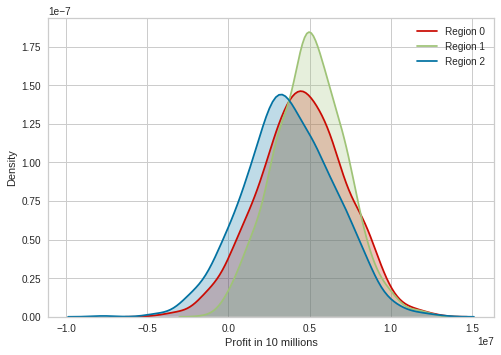

In [8]:
#random state
state = np.random.RandomState(13)

#function to calculate profit
def profit(target,prediction,count):
    predict_sorted = prediction.sort_values(ascending=False)
    selected=target[predict_sorted.index][:count]
    return 4500*selected.sum()-100000000

#region 0
#where profit values will be stored
values_0 = []
for i in range(1000):
    #get target values for 500 random observations
    target_subsample = geo_0_valid_target.sample(n=500,replace=True,random_state=state)
    #get the prediction values for those 500 random observations
    predict_subsample = pd.Series(target_pred_0)[target_subsample.index]
    #calculate the profit and add it to the values list
    values_0.append(profit(target_subsample,predict_subsample,200))
#convert to a series
values_0 = pd.Series(values_0)
#create a histogram of the profit values
sns.kdeplot(values_0,shade=True,color='r',label='Region 0')

#region 1
#where profit values will be stored
values_1 = []
for i in range(1000):
    #get target values for 500 random observations
    target_subsample = geo_1_valid_target.sample(n=500,replace=True,random_state=state)
    #get the prediction values for those 500 random observations
    predict_subsample = pd.Series(target_pred_1)[target_subsample.index]
    #calculate the profit and add it to the values list
    values_1.append(profit(target_subsample,predict_subsample,200))
#convert to a series
values_1 = pd.Series(values_1)
#create a histogram of the profit values
sns.kdeplot(values_1,shade=True,color='g',label='Region 1')

#region 2
#where profit values will be stored
values_2 = []
for i in range(1000):
    #get target values for 500 random observations
    target_subsample = geo_2_valid_target.sample(n=500,replace=True,random_state=state)
    #get the prediction values for those 500 random observations
    predict_subsample = pd.Series(target_pred_2)[target_subsample.index]
    #calculate the profit and add it to the values list
    values_2.append(profit(target_subsample,predict_subsample,200))
#convert to a series
values_2 = pd.Series(values_2)
#create a histogram of the profit values
sns.kdeplot(values_2,shade=True,color='b',label='Region 2')
#add labels to the histogram with all three regions
plt.xlabel("Profit in 10 millions")
plt.ylabel("Density")

#### Conclusions

For the bootstrapping model, I looked at 1000 samples of 500 wells chose the top 200 wells by predicted volume. I then calculated the profit for each sample and displayed the distribution of profits for each region in the histogram above. The reason I looked at 500 wells is to hopefully simulate real world possibilities with regards to the options available when OilyGiant is deciding on new fracking locations.

The histogram above shows that, while the average profits seem to be fairly similar, region 0 has more extreme high-profit outcomes, but also have more extreme low-profit outcomes than region 1. As for region 2, it seems to be statistically dominated by both regions 0 and 1. 

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
The profit calculation function and the code for bootstrapping look good, except:
    
1. Sampling should be done from the validation set, otherwise we are validating the model on the same data it was trained on, and that's not good (the reason we split the data into train and validation is to avoid this in the first place).
2. After that you might need to check that the indices of `target` and `prediction` passed into the profit function are the same.

	  
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>
	  
Unfortunately you are not selecting the corresponding predictions for the targets, because the indices don't match (for example compare `pd.Series(target_pred_0).index` and `geo_0_valid_target.index`
	  
</div>

<div class="alert alert-info">
<b>Response</b>
	  
I am getting the same indices (0-24995, step = 1) for both. What am I doing wrong?
	  
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>
	  
Oh, my bad, I missed that you reset the validation set index. Then it's correct! Sorry about that!
    
	  
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
There is also some obvious code duplication for three regions: why not make some `bootstrap()` function taking the validation set targets and predictions as input?
	  
</div>

### Risk Evaluation

In [18]:
#region 0 
#find the mean
mean_0 = round(values_0.mean(),2)
#calculate the confident interval
confid_int_0 = st.t.interval(alpha=0.95, df=len(values_0)-1, loc=np.mean(values_0), scale=st.sem(values_0)) 
confid_int_0_round = (round(confid_int_0[0], 2), round(confid_int_0[1], 2))
#calculate the percentage of trials that produced negative profits
losses_0 = []
for x in values_0.index:
    if values_0[x] < 0:
        losses_0.append(1)
    else:
        losses_0.append(0)
loss_percent_0 = round(pd.Series(losses_0).mean()*100,2)

#region 1
#find the mean
mean_1 = round(values_1.mean(),2)
#calculate the confident interval
confid_int_1 = st.t.interval(alpha=0.95, df=len(values_1)-1, loc=np.mean(values_1), scale=st.sem(values_1)) 
confid_int_1_round = (round(confid_int_1[0], 2), round(confid_int_1[1], 2))
#calculate the percentage of trials that produced negative profits
losses_1 = []
for x in values_1.index:
    if values_1[x] < 0:
        losses_1.append(1)
    else:
        losses_1.append(0)
loss_percent_1 = round(pd.Series(losses_1).mean()*100,2)        

#region 2
#find the mean
mean_2 = round(values_2.mean(),2)
#calculate the confident interval
confid_int_2 = st.t.interval(alpha=0.95, df=len(values_2)-1, loc=np.mean(values_2), scale=st.sem(values_2)) 
confid_int_2_round = (round(confid_int_2[0], 2), round(confid_int_2[1], 2))
#calculate the percentage of trials that produced negative profits
losses_2 = []
for x in values_2.index:
    if values_2[x] < 0:
        losses_2.append(1)
    else:
        losses_2.append(0)
loss_percent_2 = round(pd.Series(losses_2).mean()*100,2)  
#print the means, confidence intervals and loss percentages for each region
print('Region 0: \n \t Mean:', mean_0, '\n \t Confidence Interval:',confid_int_0_round, '\n \t Loss Percentage:',loss_percent_0)
print('Region 1: \n \t Mean:', mean_1, '\n \t Confidence Interval:',confid_int_1_round, '\n \t Loss Percentage:',loss_percent_1)
print('Region 2: \n \t Mean:', mean_2, '\n \t Confidence Interval:',confid_int_2_round, '\n \t Loss Percentage:',loss_percent_2)

RangeIndex(start=0, stop=24995, step=1)

Region 0: 
 	 Mean: 4552572.24 
 	 Confidence Interval: (4385894.37, 4719250.11) 
 	 Loss Percentage: 4.6
Region 1: 
 	 Mean: 5046653.47 
 	 Confidence Interval: (4909451.32, 5183855.62) 
 	 Loss Percentage: 0.7
Region 2: 
 	 Mean: 3746185.63 
 	 Confidence Interval: (3572736.39, 3919634.87) 
 	 Loss Percentage: 8.6


#### Conclusions

Overall, region 1 has the highest mean profit with the lowest loss percentage. For that reason, it is clear that region 1 is the recommended choice as an area for OilyGiant to build new wells. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Mean profit, 95% confidence interval and risk of losses are calculated correctly, but again there is some obvious code duplication.
	  
</div>

## Overall Conclusions

In this project, I looked at which of three regions is an optimal choice for OilyGiant to build new wells. I used linear regression models that used 3 factors to predict the volume of a new well. Afterward, I looked at regions with the overall highest performing wells. Lastly, I bootstrapped the data from each region to simulate realistic scenarios of choices OilyGiant will have to make when choosing wells in a specific region.

Overall, it is clear that simple statistics can lead one astray when making choices. If someone just looked at the average volume per well per location, they would have never considered region 1. Yet, due to the clumping nature of the data, the linear regression model was able to identify high-volume wells with much greater accuracy than in other regions. This led to the model significantly outperforming the two other regions, in terms of profit and loss percentage, even with lower average volume. 

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
Please check the conclusions after fixing the problems above
	  
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Region choice is correct and justified!
	  
</div>